In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def quadratic_variation2D(X,Y):
    msd2D = np.power(np.diff(X, axis=0, prepend=0.),2) + np.power(np.diff(Y, axis=0, prepend=0.),2)
    return np.cumsum(msd2D, axis=0)

In [3]:
def displacement2D():
    D_t = 0.2
    D_r = 0.17
    v_0 = 0.5
    n = 10000 # number of steps
    d = 10 # number of Brownian motion (samples)
    T = 1. # time
    times = np.linspace(0.,T,n)
    dt = times[1]-times[0]
    # X_t2 - X_t1 ~ Normal with mean 0 and variance t2-t1
    d_theta = np.sqrt(2*D_r*dt)*np.random.uniform(0, 2 * np.pi,size=(n-1,d))
    dX = v_0*np.cos(d_theta)*dt+np.sqrt(2*D_t*dt) * np.random.normal(0,1,size=(n-1, d))
    dY = v_0*np.sin(d_theta)*dt+np.sqrt(2*D_t*dt) * np.random.normal(0,1,size=(n-1, d))
    X_0 = np.zeros(shape=(1, d))
    theta_0 = np.zeros(shape=(1, d))
    X = np.concatenate((X_0, np.cumsum(dX, axis=0)), axis=0)
    Y = np.concatenate((X_0, np.cumsum(dY, axis=0)), axis=0)
    theta = np.concatenate((theta_0, np.cumsum(d_theta, axis=0)), axis=0)
    return times, X, Y

In [4]:
t2, X_disp, Y_disp = displacement2D()

In [5]:
def msd_function2D(time, D):
    return 4 * D * time

params, covariance = curve_fit(msd_function2D, t2, quadratic_variation2D(X_disp, Y_disp)[:,0])
D = params[0]

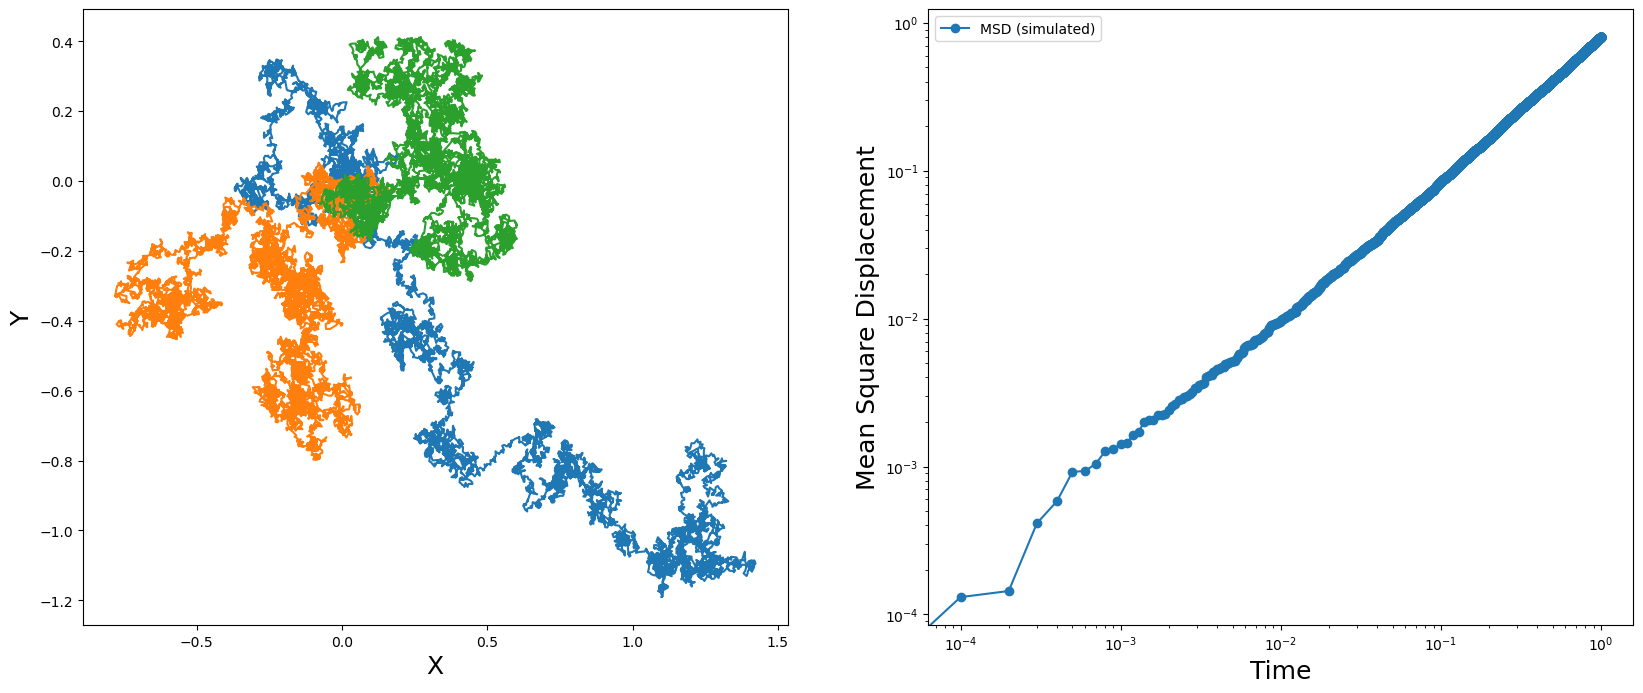

In [6]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 8))
ax1.plot(X_disp[:,:3], Y_disp[:,:3], label='Particle trajectory')
ax2.plot(t2, quadratic_variation2D(X_disp, Y_disp)[:,0], label='MSD (simulated)', marker='o')
#ax2.plot(t2, msd_function2D(t2, D), label=f'Fitted MSD (4Dt), D={D:.4f}', color='red')
ax1.set_xlabel("X", fontsize = 18)
ax2.set_xlabel("Time", fontsize = 18)
ax1.set_ylabel("Y", fontsize = 18)
ax2.set_ylabel("Mean Square Displacement", fontsize = 18)
ax2.set_xscale('log')
ax2.set_yscale('log')
plt.legend()
plt.show()

In [7]:
quadratic_variation2D(X_disp, Y_disp)[:,0]

array([0.00000000e+00, 1.30913799e-04, 1.43987843e-04, ...,
       7.99991290e-01, 8.00109654e-01, 8.00149069e-01])

In [8]:
X_disp[:,:3]

array([[ 0.        ,  0.        ,  0.        ],
       [-0.00180274,  0.00445195, -0.00224572],
       [-0.00520562, -0.00124231, -0.01031398],
       ...,
       [ 1.11881271, -0.7304527 ,  0.49470937],
       [ 1.11143025, -0.73371882,  0.49660805],
       [ 1.11543788, -0.72942995,  0.49402134]])

In [9]:
np.random.rand()

0.9861537260150459